In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np


In [2]:
df=pd.read_csv('./Data_reg/boston_house_prices.csv')
print(df) 
df.info()

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# Déterminer les corrélations les plus fortes
df.corrwith(df['RM'], method = 'pearson').sort_values(ascending = False)

RM         1.000000
MEDV       0.695360
ZN         0.311991
DIS        0.205246
B          0.128069
CHAS       0.091251
RAD       -0.209847
CRIM      -0.219247
AGE       -0.240265
TAX       -0.292048
NOX       -0.302188
PTRATIO   -0.355501
INDUS     -0.391676
LSTAT     -0.613808
dtype: float64

In [5]:
x1=df[['RM']]
x2=df[['LSTAT']]
y=np.array(df[['MEDV']])

y=y.reshape(y.shape[0],1)
y.shape

(506, 1)

In [6]:
#matrice X
X=np.hstack((x1,x2,np.ones(x1.shape)))
X.shape

(506, 3)

# Theta

In [7]:
#initialisation de theta
theta=np.random.randn(3,1)
theta

array([[-0.04375142],
       [ 0.09137191],
       [ 0.1216061 ]])

## Modèle


In [8]:
def model(x,theta):
    return X.dot(theta)

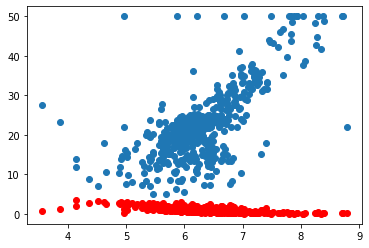

In [9]:
plt.scatter(x1,y)
plt.scatter(x1,model(X,theta), color='r')

## Fonction coût

In [10]:
#Fonction Cout 

def cost_fonction(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [11]:
cost_fonction(X,y,theta)

278.8202308644446

# Gradient et descente de gradient


In [12]:
def grad (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [13]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
        cost_history[i]=cost_fonction(X,y,theta)
    return theta,cost_history

 ## Theta Final 
 

In [14]:

n_iterations= 900
learning_rate =0.0007
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)
    


In [15]:
theta_final

array([[ 4.79504818],
       [-0.66164392],
       [ 0.77572283]])

In [16]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 
    

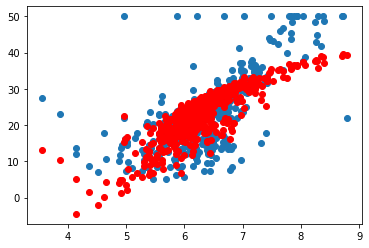

In [17]:
predictions=model(X,theta_final)
plt.scatter(x1,y)
plt.scatter(x1,predictions,c='r')

# Visualisation 3D


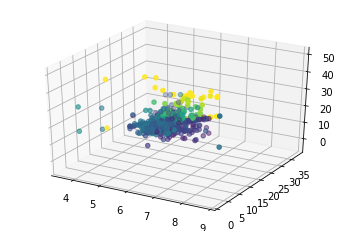

In [18]:
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, c=y)
ax.scatter(x1, x2, predictions, c=y)

# Courbe d'apprentissage 

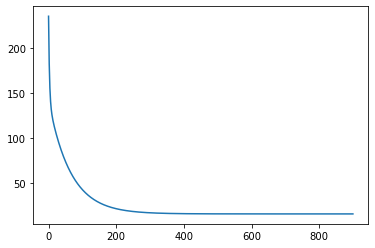

In [19]:
plt.plot(range(n_iterations),cost_history)

In [20]:
coef_determination(y,predictions)

0.6382335062686587